# 8장 머신러닝 응용

## 8.4 PyCaret 

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
import warnings
warnings.filterwarnings('ignore')

In [2]:
def summary(df) :
    tf = pd.DataFrame({'데이터형태(dtypes)' : df.dtypes,
                       '결측치 수(null)' : df.isnull().sum(),
                       '고유값 수(nunique)' : df.nunique()})
    return tf

In [3]:
# check version
from pycaret.utils import version
version()

'2.1.2'

In [4]:
from pycaret.datasets import get_data
diabetes = get_data('diabetes')
diabetes.shape

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


(768, 9)

In [5]:
from pycaret.classification import *
clf1 = setup(data = diabetes, target = 'Class variable')

Setup Succesfully Completed!


,Description,Value
0,session_id,2058
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(768, 9)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [6]:
len(clf1)
clf1[0]

25

,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Number of times pregnant_0,Number of times pregnant_1,Number of times pregnant_10,...,Number of times pregnant_15,Number of times pregnant_17,Number of times pregnant_2,Number of times pregnant_3,Number of times pregnant_4,Number of times pregnant_5,Number of times pregnant_6,Number of times pregnant_7,Number of times pregnant_8,Number of times pregnant_9
0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,183.0,64.0,0.0,0.0,23.3,0.672,32.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
764,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
765,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
766,126.0,60.0,0.0,0.0,30.1,0.349,47.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Logistic Regression,0.7767,0.8130,0.5836,0.7365,0.6428,0.4850,0.4973,0.0409
1,Linear Discriminant Analysis,0.7618,0.8115,0.5409,0.7195,0.6118,0.4458,0.4589,0.0059
2,Ridge Classifier,0.7600,0.0000,0.5354,0.7170,0.6071,0.4404,0.4538,0.0076
3,Gradient Boosting Classifier,0.7469,0.8004,0.5839,0.6613,0.6146,0.4286,0.4343,0.1404
4,CatBoost Classifier,0.7377,0.8172,0.5570,0.6487,0.5946,0.4035,0.4092,1.8748
5,Ada Boost Classifier,0.7283,0.7776,0.5673,0.6283,0.5894,0.3890,0.3948,0.1142
6,K Neighbors Classifier,0.7263,0.7427,0.5509,0.6286,0.5830,0.3818,0.3861,0.0056
7,Light Gradient Boosting Machine,0.7246,0.7778,0.5886,0.6155,0.5949,0.3885,0.3930,0.0762
8,Extra Trees Classifier,0.7227,0.7818,0.4874,0.6485,0.5463,0.3547,0.3674,0.1550
9,Random Forest Classifier,0.7189,0.7689,0.4173,0.6614,0.5025,0.3229,0.3436,0.0314


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2058, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
models().head(7)
models().shape

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process.GPC,False


(18, 3)

In [9]:
lr = create_model('lr', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7593,0.8098,0.6842,0.6500,0.6667,0.4785,0.4788
1,0.7407,0.8011,0.4474,0.7083,0.5484,0.3793,0.3990
2,0.7664,0.7618,0.5676,0.7000,0.6269,0.4595,0.4648
3,0.7290,0.7707,0.4865,0.6429,0.5538,0.3645,0.3718
4,0.8505,0.8660,0.6486,0.8889,0.7500,0.6470,0.6634
Mean,0.7692,0.8019,0.5669,0.7180,0.6292,0.4658,0.4756
SD,0.0428,0.0368,0.0908,0.0893,0.0751,0.1008,0.1020


In [10]:
tunes_lr = tune_model(lr, fold = 5)
tunes_lr

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7500,0.8056,0.6579,0.6410,0.6494,0.4552,0.4552
1,0.7407,0.8053,0.4474,0.7083,0.5484,0.3793,0.3990
2,0.7664,0.7544,0.5676,0.7000,0.6269,0.4595,0.4648
3,0.7290,0.7734,0.4865,0.6429,0.5538,0.3645,0.3718
4,0.8505,0.8587,0.6486,0.8889,0.7500,0.6470,0.6634
Mean,0.7673,0.7995,0.5616,0.7162,0.6257,0.4611,0.4709
SD,0.0433,0.0355,0.0844,0.0907,0.0737,0.1006,0.1023


LogisticRegression(C=5.487, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2058, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
evaluate_model(tunes_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [12]:
pred_holdout = predict_model(lr)
pred_holdout.shape
pred_holdout.iloc[:, 20:27]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7359,0.7829,0.4568,0.6852,0.5481,0.372,0.3872


(231, 27)

,Number of times pregnant_6,Number of times pregnant_7,Number of times pregnant_8,Number of times pregnant_9,Class variable,Label,Score
0,0.0,0.0,0.0,0.0,0,0,0.3381
1,0.0,0.0,0.0,0.0,0,0,0.0643
2,0.0,0.0,0.0,0.0,0,0,0.3840
3,1.0,0.0,0.0,0.0,0,0,0.2370
4,0.0,0.0,0.0,0.0,0,0,0.3311
...,...,...,...,...,...,...,...
226,0.0,0.0,0.0,0.0,1,0,0.4429
227,0.0,0.0,0.0,0.0,0,0,0.3365
228,0.0,0.0,0.0,0.0,0,1,0.6463
229,0.0,0.0,0.0,0.0,0,0,0.4595


In [13]:
df = pd.read_pickle('../data/4장자료_01.pkl')
df.shape
df.columns

(3997, 50)

Index(['성별', '연령', '지역', '직업', '가구소득', '학력', '주거형태', '결혼', '자녀수', '인터넷평일',
       '인터넷주말', '인터넷휴일', '모바일평일', '모바일주말', '모바일휴일', '연령대', 'drama1', 'drama2',
       'drama3', 'drama4', 'drama5', 'drama6', 'drama7', 'drama8', 'drama9',
       'drama10', 'drama11', 'drama12', 'drama13', 'drama14', 'drama15',
       'drama16', 'tv1', 'tv2', 'tv3', 'tv4', 'tv5', 'tv6', 'tv7', 'tv8',
       'tv9', 'tv10', 'tv11', 'tv12', 'tv13', 'tv14', 'tv15', 'tv16', 'tv17',
       '구매'],
      dtype='object')

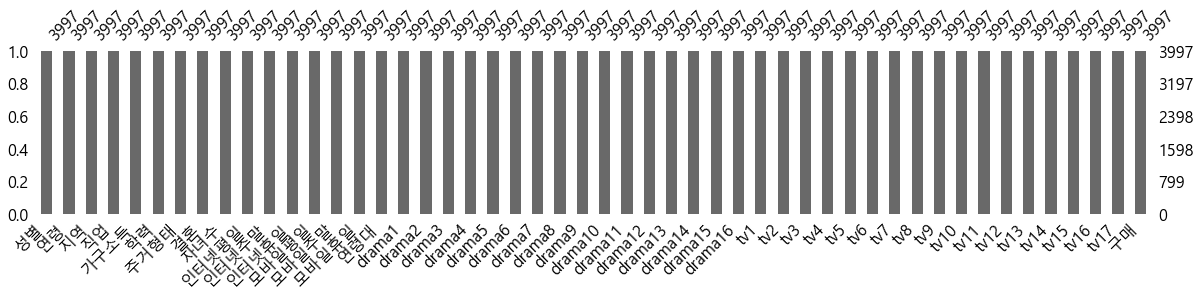

In [14]:
import missingno as msno 
msno.bar(df, figsize=(20,3))

In [15]:
#del df['연령대']
df.select_dtypes(include=['category']).columns

Index(['성별', '지역', '직업', '학력', '주거형태', '결혼', '연령대'], dtype='object')

In [18]:
clf2 = setup(data = df, 
             target = '구매',
             categorical_features = df.select_dtypes(include=['category']).columns, 
             ignore_features = ['자녀수', '연령대'],
             normalize = True,
             train_size = 0.8,
             high_cardinality_features = ['학력'],
             silent = True)

Setup Succesfully Completed!


,Description,Value
0,session_id,4038
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(3997, 50)"
4,Missing Values,False
5,Numeric Features,11
6,Categorical Features,38
7,Ordinal Features,False
8,High Cardinality Features,True
9,High Cardinality Method,frequency


In [19]:
clf2[2]

,연령,가구소득,학력,인터넷평일,인터넷주말,인터넷휴일,모바일평일,모바일주말,모바일휴일,drama4,...,tv13_0.0,tv13_1.0,tv14_0.0,tv14_1.0,tv15_0.0,tv15_1.0,tv16_0.0,tv16_1.0,tv17_0.0,tv17_1.0
1679,0.436693,-0.303885,0.826929,-0.804841,-1.279541,-1.084748,-0.400216,-0.338293,-0.278089,-0.458220,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1072,1.427194,-1.319036,0.826929,-0.059160,-0.274609,-0.288097,-0.863126,-1.239354,-1.106968,-1.740786,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1443,1.427194,-1.826612,-1.822272,-0.059160,-0.274609,-0.288097,-1.171732,-1.599869,-1.438603,-0.458220,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
412,1.493228,-1.319036,0.826929,0.652994,-1.279541,-1.084748,0.525604,1.222392,1.157573,0.824347,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2089,0.964960,1.218842,0.826929,-0.059160,-0.274609,-0.288097,-0.863126,-0.962722,-0.852496,-0.458220,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199,0.766860,-0.303885,0.826929,-0.059160,-0.274609,-0.288097,-0.400216,-0.338293,-0.278089,-0.458220,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1028,0.238593,-0.303885,0.826929,-0.804841,-0.598672,-1.084748,-0.863126,-0.962722,-0.852496,0.824347,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
450,1.757362,-1.319036,0.826929,-0.075924,0.082196,0.178154,-0.400216,-0.338293,-0.278089,-1.740786,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
264,0.304626,-0.303885,0.826929,-1.290786,-0.598672,-0.453297,-0.400216,0.544783,0.534246,-0.458220,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [21]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.6991,0.7063,0.3282,0.6307,0.4297,0.2524,0.2781,5.0667
1,Light Gradient Boosting Machine,0.6960,0.6917,0.3832,0.5981,0.4662,0.2677,0.2812,0.1896
2,Gradient Boosting Classifier,0.6888,0.6966,0.2967,0.6071,0.3975,0.2199,0.2460,0.7367
3,Extra Trees Classifier,0.6875,0.6909,0.3733,0.5792,0.4532,0.2484,0.2607,0.2963
4,Extreme Gradient Boosting,0.6847,0.6812,0.4166,0.5622,0.4772,0.2591,0.2656,0.4987
5,Random Forest Classifier,0.6747,0.6573,0.2813,0.5628,0.3744,0.1867,0.2074,0.0471
6,Logistic Regression,0.6716,0.6606,0.2732,0.5611,0.3653,0.1776,0.2000,0.1070
7,Linear Discriminant Analysis,0.6709,0.6603,0.2804,0.5574,0.3712,0.1797,0.2005,0.0615
8,Ridge Classifier,0.6700,0.0000,0.2561,0.5600,0.3492,0.1671,0.1915,0.0169
9,Ada Boost Classifier,0.6634,0.6606,0.2804,0.5311,0.3652,0.1654,0.1818,0.3234


In [32]:
ensemble = models(type ='ensemble').index.tolist()
ensemble

['rf', 'ada', 'gbc', 'et', 'xgboost', 'lightgbm', 'catboost']

In [33]:
ensembled_models = compare_models(include = ensemble, fold = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.6997,0.6999,0.3147,0.6360,0.4210,0.2483,0.2764,4.6097
1,Light Gradient Boosting Machine,0.6941,0.6876,0.3959,0.5892,0.4730,0.2690,0.2800,0.1639
2,Extra Trees Classifier,0.6935,0.6897,0.3706,0.5932,0.4559,0.2582,0.2721,0.2709
3,Gradient Boosting Classifier,0.6903,0.6967,0.3003,0.6124,0.4024,0.2247,0.2513,0.5622
4,Extreme Gradient Boosting,0.6828,0.6805,0.4067,0.5592,0.4706,0.2523,0.2589,0.3943
5,Ada Boost Classifier,0.6741,0.6617,0.3039,0.5573,0.3926,0.1954,0.2126,0.2550
6,Random Forest Classifier,0.6700,0.6423,0.2705,0.5500,0.3622,0.1733,0.1933,0.0432


In [29]:
catboost = create_model('catboost', fold = 3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7045,0.7111,0.3243,0.6486,0.4324,0.2616,0.2903
1,0.7064,0.6999,0.3189,0.6592,0.4299,0.2631,0.2945
2,0.6883,0.6887,0.3008,0.6000,0.4007,0.2203,0.2443
Mean,0.6997,0.6999,0.3147,0.6360,0.4210,0.2483,0.2764
SD,0.0081,0.0091,0.0101,0.0258,0.0144,0.0198,0.0228


In [30]:
tunes_cat = tune_model(catboost, fold = 3)
tunes_cat

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6932,0.6923,0.1892,0.7216,0.2998,0.1818,0.2489
1,0.7026,0.6947,0.2081,0.7624,0.3270,0.2093,0.2822
2,0.6948,0.6878,0.2358,0.6692,0.3487,0.2052,0.2529
Mean,0.6969,0.6916,0.2110,0.7178,0.3251,0.1988,0.2614
SD,0.0041,0.0029,0.0191,0.0381,0.0200,0.0121,0.0148


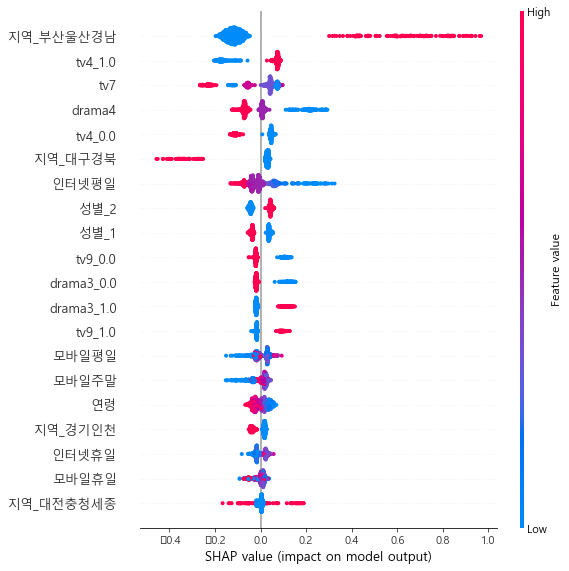

In [34]:
interpret_model(tunes_cat)

In [35]:
pred_holdout = predict_model(tunes_cat)
pred_holdout.shape
pred_holdout

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.7113,0.7104,0.2482,0.7582,0.374,0.2445,0.309


(800, 100)

,연령,가구소득,학력,인터넷평일,인터넷주말,인터넷휴일,모바일평일,모바일주말,모바일휴일,drama4,...,tv14_1.0,tv15_0.0,tv15_1.0,tv16_0.0,tv16_1.0,tv17_0.0,tv17_1.0,구매,Label,Score
0,-1.016043,0.711266,0.656147,-0.075924,0.082196,0.178154,0.062694,0.140849,0.162670,-0.458220,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1,0,0.3718
1,0.502726,0.203691,-1.734798,-0.804841,-0.371716,-0.242813,0.525604,0.544783,0.534246,-1.740786,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0,0,0.3882
2,0.766860,0.203691,0.656147,-0.075924,-1.279541,-1.084748,-0.863126,-0.962722,-0.852496,-0.458220,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1,0,0.3617
3,-1.214143,1.218842,-1.209957,-0.075924,0.082196,0.178154,-1.017429,-1.599869,-1.438603,0.824347,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0,0,0.3158
4,1.030994,1.218842,0.826929,-0.075924,-1.279541,-1.084748,-0.400216,-0.962722,-0.852496,-0.458220,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0,0,0.3921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,-1.808444,-0.303885,-1.616084,0.139761,0.379376,0.385835,-0.400216,-0.338293,-0.278089,0.824347,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1,1,0.6027
796,1.163061,-0.303885,-0.910047,-1.533759,0.082196,0.178154,-0.400216,-0.338293,-0.278089,0.824347,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1,1,0.7210
797,0.898927,-1.319036,0.826929,-0.059160,-0.274609,-0.288097,-0.247822,-0.143341,-0.123036,-0.458220,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0,0,0.2759
798,1.625295,-0.303885,0.826929,-0.075924,0.082196,-1.084748,-0.863126,-0.962722,-0.852496,-0.458220,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0,0,0.2899
